In [1]:
import requests

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
# Import Beautiful Soup
from bs4 import BeautifulSoup 
import pandas as pd
url = ['https://www.yelp.com/biz/tesla-san-francisco?osq=Tesla+Dealership','https://www.yelp.com/biz/autodeals-hayward','https://www.yelp.com/biz/buyside-auto-san-francisco-3','https://www.yelp.com/biz/albany-subaru-sales-albany']

In [2]:
reviews_tesla = []
r1 = requests.get(url[0])
soup = BeautifulSoup(r1.text, 'html.parser')
results = soup.findAll(class_='lemon--p__373c0__3Qnnj text__373c0__2pB8f comment__373c0__3EKjH text-color--normal__373c0__K_MKN text-align--left__373c0__2pnx_')
for result in results:
  reviews_tesla.append(result.text)
df = pd.DataFrame(reviews_tesla,columns= ['Tesla'])

In [3]:
reviews_AutoDeals = []
r2 = requests.get(url[1])
soup = BeautifulSoup(r2.text, 'html.parser')
results = soup.findAll(class_='lemon--p__373c0__3Qnnj text__373c0__2pB8f comment__373c0__3EKjH text-color--normal__373c0__K_MKN text-align--left__373c0__2pnx_')
for result in results:
  reviews_AutoDeals.append(result.text)
df1 = pd.DataFrame(reviews_AutoDeals,columns= ['AutoDeals'])

In [4]:
reviews_buysideAuto = []
r3 = requests.get(url[2])
soup = BeautifulSoup(r3.text, 'html.parser')
results = soup.findAll(class_='lemon--p__373c0__3Qnnj text__373c0__2pB8f comment__373c0__3EKjH text-color--normal__373c0__K_MKN text-align--left__373c0__2pnx_')
for result in results:
  reviews_buysideAuto.append(result.text)
df2 = pd.DataFrame(reviews_buysideAuto,columns= ['BuySideAuto'])

In [5]:
Contancted_df = pd.concat([df,df1], axis=1)

In [6]:
Contancted_df_final = pd.concat([Contancted_df,df2], axis=1)

In [7]:
Contancted_df_final

,Tesla,AutoDeals,BuySideAuto
0,"My model 3 got punctured on monday, slow leak ...",Shout out to Ramiro & Hugo! We have bought of ...,I purchased my latest vehicle using BuySide Au...
1,Waited 1yr prior to purchase bcuz of the flaws...,I was quite impressed with the professional se...,Tried a Yelp auto broker search and BuySide wa...
2,"This dealership has owed me $21,000 for the pa...",I was referred here by a coworker. I checked n...,BuySide Auto is a great establishment and they...
3,I bought a Model X with a warranty from Tesla ...,I just totalled my vehicle last week. We came ...,"I've worked with other car brokers, but Chris ..."
4,Unfortunately I'm here to corroborate the othe...,They were courtesy and very fast and efficient...,I was really dreading leasing a new car becaus...
5,During my first time I went into the San Franc...,"Used car dealers get a bum rap. Many times, t...",You need to do yourself a favor and use Chris ...
6,Tesla is Terrible the Computers Malfunction an...,These guys took such good care of me! They des...,Buying our car from BuySide Auto was the easie...
7,"Great car (Model 3), absolutely incompetent st...",This review is for Maria. My brother bought a ...,I got my 2019 Audi A5 Sportback from Buyside A...
8,Aside from my strong feelings as a usability r...,Worst place ever. Do not come here at all unle...,Our lease was up and we were dreading having t...
9,Quick delivery by Lee. Detailed explanation a...,I been looking to get a car and I tried few ...,Buying or leasing a car through BuySide Auto w...


In [8]:
def carAnalysis_vader(articles): 
    scores = []

    for article in articles.iteritems():
        analysis = SentimentIntensityAnalyzer()
        vs = analysis.polarity_scores(article[1])
        scores.append(vs)
        vader_sent = pd.DataFrame(scores)
    return vader_sent


def find_Sentiment(vader_sentiment):
    Sentiment = []
    for index,row in vader_sentiment.iterrows():
        if row['vader_compound'] < -0.5 and row['vader_neg']-row['vader_pos'] > 0 :
            Sentiment.append('Negative')
        elif row['vader_compound'] > 0.5 and row['vader_pos']-row['vader_neg'] > 0 :
            Sentiment.append('Positive')
        else:
            Sentiment.append('Neutral')
    return Sentiment
    
vader_sentiment = carAnalysis_vader(Contancted_df_final['Tesla'])
vader_sentiment.columns=['vader_compound','vader_neg','vader_new','vader_pos']

Sentiment = find_Sentiment(vader_sentiment)
vader_sentiment['Vader_Sentiment'] = Sentiment

vader_sentiment['Company'] = 'Tesla'
vader_sentiment
TESLA_Sentiment_New = pd.concat([Contancted_df_final['Tesla'],vader_sentiment],axis=1)

TESLA_Sentiment_New.columns = ['review','vader_compound','vader_neg','vader_new','vader_pos','Vader_Sentiment','Company']
TESLA_Sentiment_New

,review,vader_compound,vader_neg,vader_new,vader_pos,Vader_Sentiment,Company
0,"My model 3 got punctured on monday, slow leak ...",0.041,0.905,0.053,0.3382,Neutral,Tesla
1,Waited 1yr prior to purchase bcuz of the flaws...,0.049,0.892,0.060,0.5417,Neutral,Tesla
2,"This dealership has owed me $21,000 for the pa...",0.104,0.848,0.047,-0.9145,Neutral,Tesla
3,I bought a Model X with a warranty from Tesla ...,0.057,0.846,0.097,0.7088,Neutral,Tesla
4,Unfortunately I'm here to corroborate the othe...,0.110,0.775,0.115,0.1002,Neutral,Tesla
5,During my first time I went into the San Franc...,0.044,0.888,0.068,0.9431,Neutral,Tesla
6,Tesla is Terrible the Computers Malfunction an...,0.258,0.742,0.000,-0.7650,Neutral,Tesla
7,"Great car (Model 3), absolutely incompetent st...",0.241,0.601,0.158,-0.6318,Neutral,Tesla
8,Aside from my strong feelings as a usability r...,0.055,0.821,0.124,0.9826,Neutral,Tesla
9,Quick delivery by Lee. Detailed explanation a...,0.054,0.852,0.094,0.5719,Neutral,Tesla


In [9]:
vader_sentiment = carAnalysis_vader(Contancted_df_final['AutoDeals'])
vader_sentiment.columns=['vader_compound','vader_neg','vader_new','vader_pos']

Sentiment = find_Sentiment(vader_sentiment)
vader_sentiment['Vader_Sentiment'] = Sentiment

vader_sentiment['Company'] = 'AutoDeals'
vader_sentiment
AutoDeals_Sentiment_New = pd.concat([Contancted_df_final['AutoDeals'],vader_sentiment],axis=1)

AutoDeals_Sentiment_New.columns = ['review','vader_compound','vader_neg','vader_new','vader_pos','Vader_Sentiment','Company']
AutoDeals_Sentiment_New

,review,vader_compound,vader_neg,vader_new,vader_pos,Vader_Sentiment,Company
0,Shout out to Ramiro & Hugo! We have bought of ...,0.000,0.831,0.169,0.9855,Neutral,AutoDeals
1,I was quite impressed with the professional se...,0.000,0.730,0.270,0.9750,Neutral,AutoDeals
2,I was referred here by a coworker. I checked n...,0.000,0.892,0.108,0.9569,Neutral,AutoDeals
3,I just totalled my vehicle last week. We came ...,0.000,0.872,0.128,0.8303,Neutral,AutoDeals
4,They were courtesy and very fast and efficient...,0.000,0.672,0.328,0.9344,Neutral,AutoDeals
5,"Used car dealers get a bum rap. Many times, t...",0.024,0.892,0.084,0.9703,Neutral,AutoDeals
6,These guys took such good care of me! They des...,0.018,0.807,0.175,0.9601,Neutral,AutoDeals
7,This review is for Maria. My brother bought a ...,0.063,0.879,0.057,-0.2160,Neutral,AutoDeals
8,Worst place ever. Do not come here at all unle...,0.065,0.882,0.053,-0.5609,Neutral,AutoDeals
9,I been looking to get a car and I tried few ...,0.024,0.592,0.383,0.9954,Neutral,AutoDeals


In [10]:
vader_sentiment = carAnalysis_vader(Contancted_df_final['BuySideAuto'])
vader_sentiment.columns=['vader_compound','vader_neg','vader_new','vader_pos']

Sentiment = find_Sentiment(vader_sentiment)
vader_sentiment['Vader_Sentiment'] = Sentiment

vader_sentiment['Company'] = 'BuySideAuto'
vader_sentiment
BuysideAuto_Sentiment_New = pd.concat([Contancted_df_final['BuySideAuto'],vader_sentiment],axis=1)

BuysideAuto_Sentiment_New.columns = ['review','vader_compound','vader_neg','vader_new','vader_pos','Vader_Sentiment','Company']
BuysideAuto_Sentiment_New

,review,vader_compound,vader_neg,vader_new,vader_pos,Vader_Sentiment,Company
0,I purchased my latest vehicle using BuySide Au...,0.000,0.770,0.230,0.9577,Neutral,BuySideAuto
1,Tried a Yelp auto broker search and BuySide wa...,0.000,0.802,0.198,0.9569,Neutral,BuySideAuto
2,BuySide Auto is a great establishment and they...,0.013,0.698,0.288,0.9836,Neutral,BuySideAuto
3,"I've worked with other car brokers, but Chris ...",0.045,0.727,0.229,0.9547,Neutral,BuySideAuto
4,I was really dreading leasing a new car becaus...,0.069,0.757,0.174,0.9542,Neutral,BuySideAuto
5,You need to do yourself a favor and use Chris ...,0.024,0.852,0.124,0.9163,Neutral,BuySideAuto
6,Buying our car from BuySide Auto was the easie...,0.009,0.841,0.150,0.9837,Neutral,BuySideAuto
7,I got my 2019 Audi A5 Sportback from Buyside A...,0.000,0.875,0.125,0.8862,Neutral,BuySideAuto
8,Our lease was up and we were dreading having t...,0.041,0.872,0.087,0.6983,Neutral,BuySideAuto
9,Buying or leasing a car through BuySide Auto w...,0.000,0.707,0.293,0.9725,Neutral,BuySideAuto


In [11]:
AllConcat = pd.concat([TESLA_Sentiment_New,BuysideAuto_Sentiment_New,AutoDeals_Sentiment_New],axis=0,ignore_index=True)

In [12]:
AllConcat

,review,vader_compound,vader_neg,vader_new,vader_pos,Vader_Sentiment,Company
0,"My model 3 got punctured on monday, slow leak ...",0.041,0.905,0.053,0.3382,Neutral,Tesla
1,Waited 1yr prior to purchase bcuz of the flaws...,0.049,0.892,0.060,0.5417,Neutral,Tesla
2,"This dealership has owed me $21,000 for the pa...",0.104,0.848,0.047,-0.9145,Neutral,Tesla
3,I bought a Model X with a warranty from Tesla ...,0.057,0.846,0.097,0.7088,Neutral,Tesla
4,Unfortunately I'm here to corroborate the othe...,0.110,0.775,0.115,0.1002,Neutral,Tesla
5,During my first time I went into the San Franc...,0.044,0.888,0.068,0.9431,Neutral,Tesla
6,Tesla is Terrible the Computers Malfunction an...,0.258,0.742,0.000,-0.7650,Neutral,Tesla
7,"Great car (Model 3), absolutely incompetent st...",0.241,0.601,0.158,-0.6318,Neutral,Tesla
8,Aside from my strong feelings as a usability r...,0.055,0.821,0.124,0.9826,Neutral,Tesla
9,Quick delivery by Lee. Detailed explanation a...,0.054,0.852,0.094,0.5719,Neutral,Tesla


In [13]:
type(AllConcat)

pandas.core.frame.DataFrame

In [14]:
AllConcat.to_csv('ReviewsWithSentiment.csv')

In [17]:
import nltk as nlp
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords

In [18]:
nlp.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nsaik\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [19]:
from wordcloud import WordCloud

import nltk.data
from nltk.corpus import subjectivity, stopwords, wordnet, sentiwordnet
from nltk import word_tokenize, pos_tag
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem.wordnet import WordNetLemmatizer

import matplotlib.pyplot as plt
# set plot size
plt.rcParams['figure.figsize'] = (8.0, 8.0)

In [20]:
sentence_tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')
sid = SentimentIntensityAnalyzer()
lemmatizer = WordNetLemmatizer()
STOP_WORDS = set(stopwords.words('english'))

# a little memoization for synset word scores
WORD_SCORES = {}

# for replacing contractions post-tokenization
CONTRACTION_MAP = {"'s": "is",
                   "'ll": 'will',
                   "n't": "not",
                   "'ve": "have",
                   "'re": "are",
                   "'m": "am",
                   "ca": "can",
                   "'d": "would"}

# this maps nltk 'universal' tags to wordnet tags
POS_TAG_MAP = {'NOUN': 'n', 'ADJ': 'a', 'VERB': 'v', 'ADV': 'r'}

In [21]:
def normalize_arr(arr, mn= None, mx= None):
    if not mn:
        mn, mx = min(arr), max(arr)
    return list(map(lambda x : (x - mn)/ (mx - mn), arr))

def replace_contractions(token):
    if token in CONTRACTION_MAP:
        return CONTRACTION_MAP[token]
    return token

In [22]:
def get_sentences(lines):
    """break down lines into sentences
    returns a list of [(sentence, polarity score)] 
    tuples
    """
    sentences = []
    for line in lines:
        these_sents = sentence_tokenizer.tokenize(line)
        for sent in these_sents:
            sentences.append((sent, sid.polarity_scores(sent)))
    return sentences
  
    
def word_senti_score(word, POS):
    """returns nltk sentiwordnet...
    Args:
        word (str): Description
        pos (str): part of speech should be 
                   gotta be in NLTK wordnet
    Returns:
        TYPE: pos & neg values... skips neu
    """
    p, n = 0., 0.
    try:
        p, n =  WORD_SCORES[(word, POS)]
    except KeyError:
        scores = list(sentiwordnet.senti_synsets(word, POS))
        if scores: # this will average all synset words for given POS
            p = sum([s.pos_score() for s in scores])/ len(scores)
            n = sum([s.neg_score() for s in scores])/len(scores)
        WORD_SCORES[(word, POS)] = (p, n)
    return p, n

# workhorse for breaking down sentences, pos_tagging, lemmatization, returns tagged
#lemmatized words with their initial scores
def get_words(sent, sent_score, word_clean, stopwords=[], exceptions=[]):
    """tag and tokenize sentance, do cleanup on words
        and return list of word, POS pairs with their synset
        scores combined with the score of their context sentence

    Args:
        sent (str): sentence, not tokenized
        sent_score (tuple) : pos and neg scores for sentence
        word_clean (function): cleaning function to be run on
                               words after tagging
        stopwords (List): list of stopwords
        exceptions (list, optional): these words will escape the
                                     lemmatizer.
    Returns:
        List of tuples: [(word, POS, positive score, negative score)]
    """
    tagged = pos_tag(word_tokenize(sent), tagset='universal')
    words = [(word_clean(x), y) for (x,y) in tagged]
    res = []
    s_pos, s_neg = sent_score
    for (w, t) in words:
        #basically throwing everything not in i'm ok with that since
        #i've already used full sentences for polarity scores
        if t in POS_TAG_MAP:
            POS = POS_TAG_MAP[t]
            if w in exceptions: # don't lemmatize words like 'ISIS'
                word, POS = w,POS
            else:
                 word = lemmatizer.lemmatize(w, POS)
            if word not in stopwords: 
                p, n = word_senti_score(word, POS)
                # this is a little arbitrary but it seems to work well...
                # I add the (often 0. in the case of neutral words) senti_synset
                # score to the vader score for that sentence....
                w_pos = 1. * (p + s_pos )
                w_neg = 1. * (n + s_neg)
                res.append((word, POS, w_pos, w_neg))
    return res
    

def get_vocab(sentences, word_getter):
    words = []
    for sentence, score in sentences:
        s_pos, s_neg = score['pos'] , score['neg']
        words += word_getter(sentence, (s_pos, s_neg))
    unique_words = set([e[0] for e in words])
    vocab = [list(unique_words), [], [], []] # word, count, pos, neg ... because pandas joins make everyting slower
    for u_word in unique_words:
        w_dat = [e for e in words if  e[0] == u_word]
        count = len(w_dat)
        vocab[1].append(count)
        # ... then i get the mean for all uses of that word (within a single individuals
        # vocabulary)
        p, n = sum([e[-2] for e in w_dat])/ float(count), sum([e[-1] for e in w_dat])/ float(count)
        vocab[2].append(p)
        vocab[3].append(n)
                        
    #then i scale scores for entire vocab between 0 & 1
    vocab[2] = normalize_arr(vocab[2])
    vocab[3] = normalize_arr(vocab[3])
    return vocab


def get_data(lines, additional_stopwords=[], exceptions=[]):
    sentences = get_sentences(lines)
    (words, counts, pos_vals, neg_vals) = get_vocab(sentences, 
                                                    word_getter= lambda s, sc: get_words(s, sc,
                                                                                   word_clean=lambda x: replace_contractions(x.lower()),
                                                                                    stopwords=additional_stopwords | STOP_WORDS,
                                                                                    exceptions=exceptions)                                                                             )
    return pd.DataFrame({'word': words, 
                    'count': counts, 
                     'pos': pos_vals, 
                     'neg': neg_vals}, 
                       columns = ['word', 'count', 'pos', 'neg'])

In [23]:
def gen_cloud(data):
    counts = dict([(w, data[w]['count']) for w in data])
    def sent_color_function(word=None, font_size=None, position=None,
                            orientation=None, font_path=None, random_state=None):
        """sentiment color generator for WordCloud 
        """
        r, g, b = 126 + int(255 * data[word]['neg']), 126, 126 + int(255 * data[word]['pos'])
        if r > 255:
            v = r - 255
            b = max(b - v, 0)
            g = max(g - v, 0)
            r = 255
        if b > 255:
            v = b - 255
            r = max(r - v, 0)
            g = max(g - v, 0) 
            b = 255
        return "rgb({}, {}, {})".format(r, g, b)

    wordcloud = WordCloud(  max_font_size = 100,
                            width= 800, 
                            height = 400,
                            color_func=sent_color_function).generate_from_frequencies(counts)
    return wordcloud


def show_cloud(cloud, label):
    plt.title(label)
    plt.imshow(cloud)
    plt.axis("off")
    plt.show()
    
def show_basics(vocab):
    print('unique word count : {}\n'.format(vocab.shape[0]))
    print( 'top 10 most used frequent words:')
    print( vocab.nlargest(10, 'count'), '\n')
    print( 'most positive words:')
    print( vocab.nlargest(12, 'pos'), '\n')
    print( 'most negative words:')
    print( vocab.nlargest(12, 'neg'), '\n')

In [24]:
junk = set([ 'say', 'get', 'think', 'go', 'people', 'well', 'come', 'would', 'could',
             'would', 'want', 'become', 'donald', 'hillary', 'lester', 'make', 'chris', 'know', 
             'take', 'lot', 'tell', 'way', 'need', 'give', 'see', 'year', 'many', 'talk', 'clinton', 
             'trump', 'really', 'look', 'let', 'much', 'thing', 'country', 'president', 'also','le','ha'])

exceptions = ['isis', 'isil', 'sanders']

In [26]:
# read in data
df4 = pd.read_csv('ReviewsWithSentiment.csv')

In [27]:
clinton_vocab = get_data(  list(df4['review'][df4['Company'] == 'Tesla'].values), 
                                additional_stopwords=junk, 
                                exceptions=exceptions)

In [29]:
TeslaWords = show_basics(clinton_vocab)

unique word count : 769

top 10 most used frequent words:
           word  count       pos       neg
100         car     65  0.086326  0.028938
130     service     35  0.067109  0.064469
484       tesla     26  0.051108  0.082166
764        call     18  0.096285  0.045537
437       drive     15  0.104829  0.041451
160         ask     14  0.101829  0.045851
538        work     14  0.124342  0.046569
12         back     11  0.059200  0.032155
602  experience     11  0.128436  0.075578
115        wait     10  0.060880  0.079040 

most positive words:
             word  count       pos       neg
108           wow      1  1.000000  0.240000
204    researcher      1  0.967200  0.051200
461     excellent      2  0.926400  0.015360
529       perfect      1  0.873333  0.026667
145          love      2  0.851600  0.100960
494     wonderful      1  0.832800  0.000000
434     obviously      1  0.824800  0.000000
637  unbelievable      1  0.800000  0.160000
112      pleasant      1  0.791600  0.077

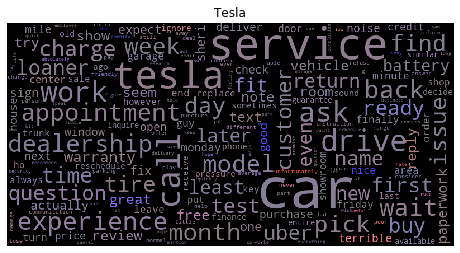

In [30]:
clinton_cloud = gen_cloud(dict(clinton_vocab.set_index('word').to_dict('index')))
show_cloud(clinton_cloud, label = 'Tesla')

In [28]:
Buysideauto_vocab = get_data(  list(df4['review'][df4['Company'] == 'BuySideAuto'].values), 
                                additional_stopwords=junk, 
                                exceptions=exceptions)
show_basics(Buysideauto_vocab)

unique word count : 658

top 10 most used frequent words:
           word  count       pos       neg
313         car     59  0.065917  0.034982
421  dealership     23  0.077224  0.024536
86          new     22  0.183047  0.134651
200    roadster     20  0.091164  0.020597
260       lease     20  0.053430  0.037343
469     buyside     20  0.128552  0.007452
434        auto     18  0.115231  0.003535
418  experience     15  0.144976  0.031873
187     deliver     14  0.067502  0.018291
66       broker     13  0.104963  0.031688 

most positive words:
         word  count       pos       neg
335      love      1  1.000000  0.026165
559   awesome      1  0.805960  0.104661
616   upfront      1  0.773389  0.104661
250  pleasant      1  0.702356  0.052330
36    amazing      1  0.697505  0.156991
442  skillful      1  0.696812  0.000000
441       lol      1  0.693001  0.000000
579     lucky      1  0.689305  0.000000
179   welcome      1  0.648302  0.000000
314     super      1  0.633865  0.10

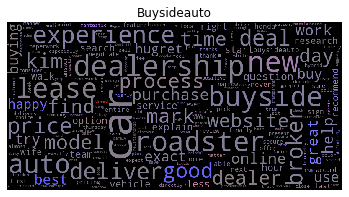

In [29]:
Buysideauto_cloud = gen_cloud(dict(Buysideauto_vocab .set_index('word').to_dict('index')))
show_cloud(Buysideauto_cloud, label = 'Buysideauto')

unique word count : 464

top 10 most used frequent words:
           word  count       pos       neg
207         car     45  0.104829  0.018007
257        work     10  0.112628  0.015552
148  definitely      9  0.559653  0.001822
238        sell      9  0.075407  0.057238
289  dealership      9  0.135792  0.052608
398        time      9  0.154717  0.083808
48        phone      8  0.051910  0.019301
215        help      8  0.246721  0.025098
279       drive      8  0.107979  0.017137
314         buy      8  0.150790  0.030147 

most positive words:
            word  count       pos       neg
426         nice      1  1.000000  0.051241
161     courtesy      1  0.909862  0.000000
42     beautiful      1  0.835382  0.034161
12          good      5  0.808119  0.010899
348        happy      5  0.800790  0.047552
445  comfortable      1  0.781387  0.153724
168         best      4  0.763551  0.040094
210        super      3  0.757097  0.085402
282         easy      3  0.755268  0.149453
400   

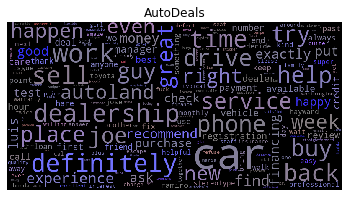

In [30]:
AutoDeals_vocab = get_data(  list(df4['review'][df4['Company'] == 'AutoDeals'].values), 
                                additional_stopwords=junk, 
                                exceptions=exceptions)
show_basics(AutoDeals_vocab)
AutoDeals_cloud = gen_cloud(dict(AutoDeals_vocab.set_index('word').to_dict('index')))
show_cloud(AutoDeals_cloud, label = 'AutoDeals')
